In [ ]:
words = open('names.txt', 'r').read().splitlines()

In [14]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [4]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [ ]:
# create the training set of biagrams (x, y)
xs , ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        # N[ix1, ix2] += 1


xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [9]:
xs

tensor([ 0,  5, 13, 13,  1])

In [10]:
ys

tensor([ 5, 13, 13,  1,  0])

In [34]:
import torch.nn.functional as F 
xenc = F.one_hot(xs, num_classes=27).float()
yenc = F.one_hot(ys, num_classes=27).float()

In [16]:
xenc

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

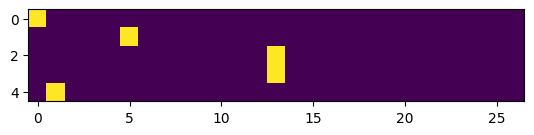

In [19]:
plt.imshow(xenc)

In [41]:
w = torch.randn((27,27))
(xenc @ w)

tensor([[-2.1682e+00,  3.0043e-01, -6.7169e-01,  1.6445e+00, -2.6671e+00,
          4.6089e-02, -2.9483e-01, -1.3571e+00, -1.5053e-01, -1.2700e-01,
         -8.1842e-01,  1.2063e+00,  1.0046e+00, -8.0540e-01, -2.5065e-01,
         -1.2354e+00,  3.1624e-02, -5.7383e-02, -8.8415e-01,  1.1169e-01,
         -3.5052e-01,  3.9823e-01,  1.7260e-01, -3.0130e-01, -6.5483e-01,
         -1.8462e+00, -3.2357e-01],
        [-8.7041e-01,  5.5337e-01,  2.4440e-01,  4.0379e-01,  3.2220e-01,
          3.9463e-01, -2.4915e-01, -1.5627e+00,  1.3123e+00, -6.5781e-01,
          8.9525e-01,  5.3981e-01,  1.1770e-01, -9.4889e-01, -6.7082e-01,
         -2.9581e-01,  5.2513e-01,  2.8803e-01,  2.3462e-01,  5.1168e-01,
          8.2624e-01,  1.1143e+00, -6.3670e-02,  1.0796e+00,  1.3483e-01,
          1.1475e+00, -1.8314e+00],
        [-1.2865e+00,  8.9343e-01,  1.4218e-01, -8.2844e-01, -9.9270e-02,
          9.9463e-01, -5.0427e-01, -5.6503e-01,  5.9761e-01, -1.2194e+00,
          1.2671e+00,  1.5457e+00,  4.68

In [44]:
logits = (xenc @ w) #log-counts
counts = logits.exp() #equivalent N
probs = counts / counts.sum(1, keepdim=True)

In [46]:
xs

tensor([ 0,  5, 13, 13,  1])

In [47]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# Initializes the weights of 27 neurons randomly, each receives 27 inputs
# 27 inputs -> 27 neurons
g = torch.Generator().manual_seed(2147483647)
w = torch.randn((27, 27), generator=g)

In [49]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ w
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)